In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.autograd import Variable
import torchvision

In [5]:
mnist = torchvision.datasets.MNIST('.',train=True)

In [6]:
print(mnist.train_data.shape,mnist.train_labels.shape)

torch.Size([60000, 28, 28]) torch.Size([60000])


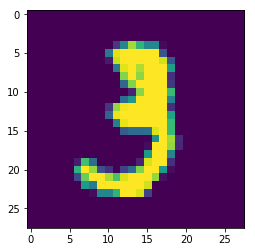

In [7]:
plt.imshow(mnist.train_data[10])

In [16]:
flat_mnist = mnist.train_data
flat_mnist = flat_mnist.unsqueeze(1)
print(flat_mnist.shape)

torch.Size([60000, 1, 28, 28])


Переделать нашу линейную архитектуру в свертночную.

Нам нужны будут следующие слои:
1. Свертка исходного изображения -> на выходе 10 карт (ядро 5)
2. Свертка 10 карт в 20 (ядро 5)
3. Слой Dropout с вероятность 50%
4. Линецный слой 320 в 50
5. Линейный слой 50 в 10

Граф вычислений:
1. Свертка исходного изображения -> на выходе 10 карт (ядро 5)
2. Max Pooling 2,2
3. ReLU
4. Свертка 10 карт в 20 (ядро 5)
5. Max Pooling 2,2
6. ReLU
7. Dropout с вероятность 50%
8. Превратит в вектор N,320
9. Линецный слой 320 в 50
10. ReLU
11. Линейный слой 50 в 10
12. Softmax

In [17]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        #TODO задать слои
    def forward(self, x):
        #TODO задать граф вычислений
        return F.log_softmax(x, dim=1)
    
net = ConvNet()
print(net)

ConvNet(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5)
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)


In [18]:
mean_x = torch.mean(flat_mnist.float())
std_x = torch.std(flat_mnist.float())
train_data = (flat_mnist.float()-mean_x)/std_x

In [19]:
import numpy as np
indexes = np.random.randint(0,train_data.shape[0],10)
print(indexes)

[ 9653 52341 26119 23751  1493 21104  2698 58222  2978  2279]


In [20]:
optimizer = optim.SGD(net.parameters(),0.0001)
errors = []
net.train()
for i in range(3000):
    indexes = torch.LongTensor(np.random.randint(0,train_data.shape[0],100))
    data, target = Variable(train_data[indexes]), Variable(mnist.train_labels[indexes].long())
    optimizer.zero_grad()
    output = net(data)
    loss = F.nll_loss(output, target, size_average=False)
    errors.append(loss.data[0])
    loss.backward()
    optimizer.step()

In [ ]:
#TODO Заменить SGD на Adam

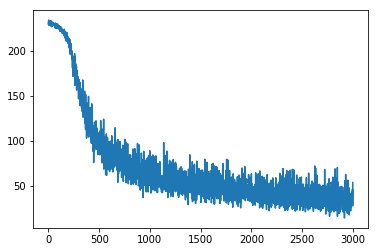

In [21]:
plt.plot(errors)

Проверить результат на test

In [98]:
mnist_test = torchvision.datasets.MNIST('.',train=False)
#TODO проверить accuracy

Изменить learning rate, архитектуру